In [85]:
import pandas as pd
import spacy
from scipy import stats
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import re
from gensim.parsing.preprocessing import preprocess_documents 
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel 
from gensim.models import CoherenceModel
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import warnings
warnings.filterwarnings('ignore')

In [86]:
df = pd.read_csv("data_train_preprocessed.csv", keep_default_na=False)
tokens = df["processed_text_alt"]

In [87]:
analyzer = SentimentIntensityAnalyzer()
title = df["text"]
items = []
for i,txt in enumerate(tokens):
    blob = TextBlob(txt)
    scores = analyzer.polarity_scores(txt)
    
    item = {
        "processed_text_alt":txt,
        "sentiment_blob":blob.polarity,
        "sentiment_vader": scores["compound"]
    }
    items.append(item)
        
items = pd.DataFrame(items)
items.sort_values("sentiment_blob",ascending=False).head(10)

,processed_text_alt,sentiment_blob,sentiment_vader
487,swiggy beme detery sere cempany zomato said be...,1.0,0.8360
673,best friend make plan someone else friendship day,1.0,0.8834
1885,work home mom wat secieny thints ilo mem sin t...,1.0,0.1531
2586,best street name ever goa way,1.0,0.6369
50,dr grayfang dororayfang dpraytang foloning oyt...,1.0,0.6369
416,got 98 chance surviving china virus msm get co...,1.0,0.8591
668,find perfect apocalypse get got ta flex,1.0,0.5719
982,vote best meme,1.0,0.6369
522,ben schwartze drejectecokes started gag birthd...,1.0,0.7845
1846,waiting meeting end soi go bathtoom best work ...,1.0,0.6369


In [88]:
df=df[["processed_text_alt","binary_labels"]]
df = df.merge(items, on="processed_text_alt",how="left")
df

,processed_text_alt,binary_labels,sentiment_blob,sentiment_vader
0,bernie elizabeth issue matter issue make danke...,1,0.000000,0.0258
1,extending brexit deadline october 31st order e...,1,0.468182,0.6249
2,kwai gkwa 0964 nnevvy applause thai hong kong ...,0,0.100000,-0.1531
3,order foce mask protect ogainst fhe corond vir...,0,0.000000,0.3818
4,best candidate ja 2020 joe biden kamala harris...,1,1.000000,0.6369
...,...,...,...,...
3660,people born boveteojoe foleing coming week soy...,0,0.800000,0.5719
3661,washing hand 20 second 57 time one day,0,0.000000,0.4939
3662,washing hand 20 second 57 time one day,0,0.000000,0.4939
3663,washing hand 20 second 57 time one day,0,0.000000,0.4939


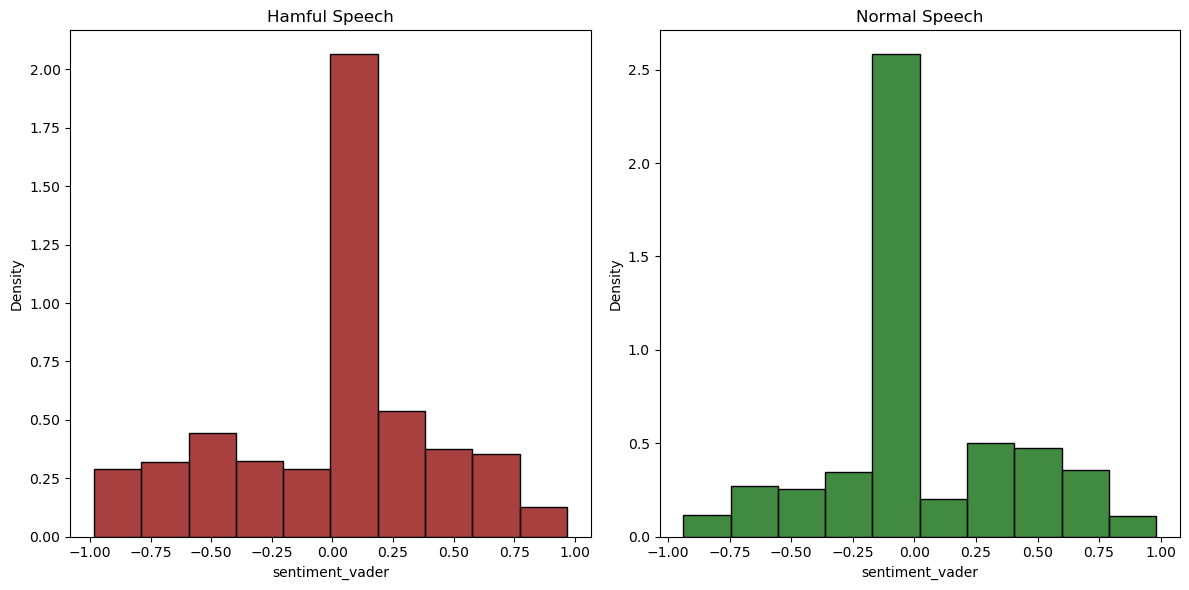

In [89]:
plt.figure(figsize=(12, 6))

# Hexbin plot for sentiment_blob vs num_comments
plt.subplot(1, 2, 2)  
sns.histplot(data=df[df["binary_labels"]==0], x='sentiment_vader',color="darkgreen", bins=10,stat="density")
plt.title("Normal Speech")

plt.subplot(1, 2, 1)  
sns.histplot(data=df[df["binary_labels"]==1], x='sentiment_vader', color='darkred', bins=10,stat="density")
plt.title("Hamful Speech")

plt.tight_layout()
plt.show()

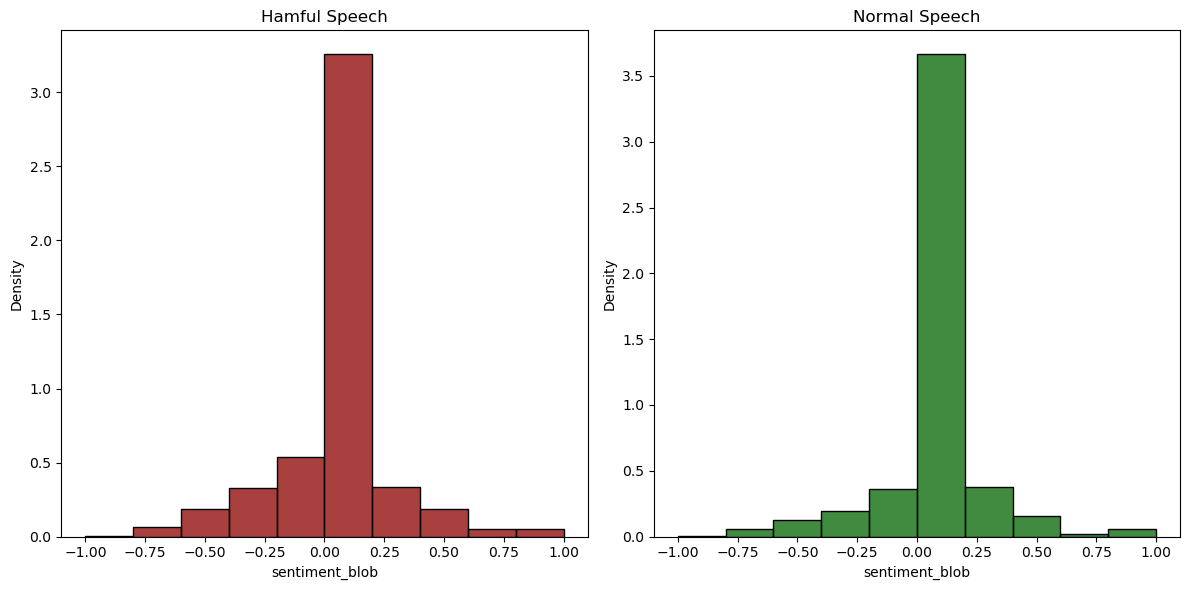

In [90]:
plt.figure(figsize=(12, 6))

# Hexbin plot for sentiment_blob vs num_comments
plt.subplot(1, 2, 2)  
sns.histplot(data=df[df["binary_labels"]==0], x='sentiment_blob',color="darkgreen", bins=10,stat="density")
plt.title("Normal Speech")

plt.subplot(1, 2, 1)  
sns.histplot(data=df[df["binary_labels"]==1], x='sentiment_blob', color='darkred', bins=10,stat="density")
plt.title("Hamful Speech")

plt.tight_layout()
plt.show()

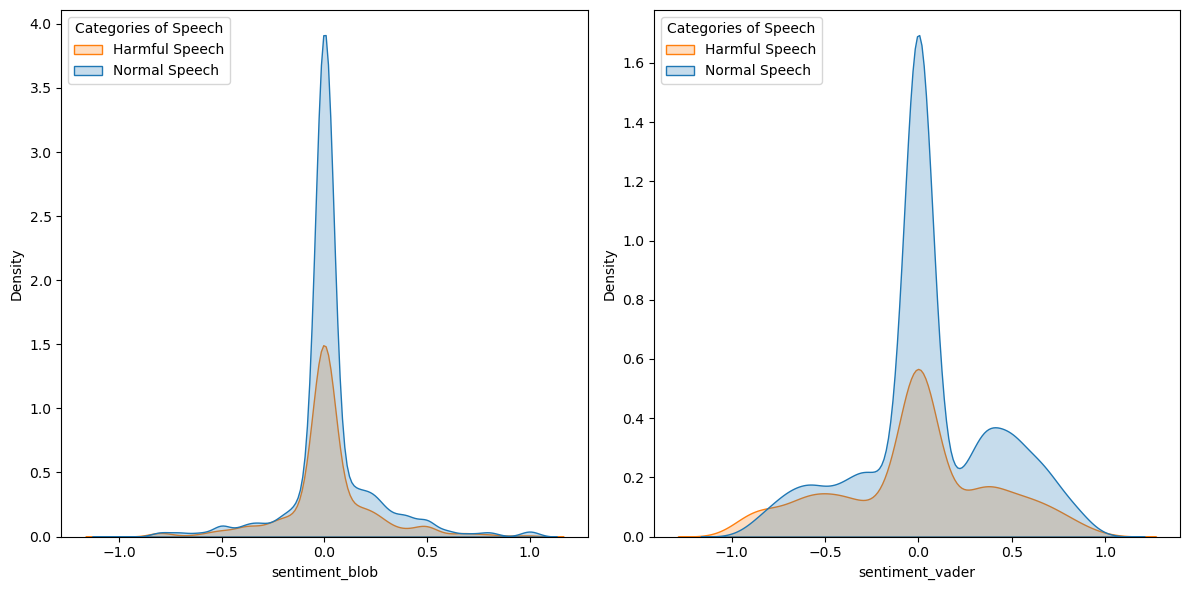

In [91]:
plt.figure(figsize=(12, 6))

# Hexbin plot for sentiment_blob vs num_comments
plt.subplot(1, 2, 2)  
sns.kdeplot(data=df, x='sentiment_vader', hue='binary_labels', fill=True)
plt.legend(title='Categories of Speech', loc='upper left', labels=['Harmful Speech', 'Normal Speech'])

# Hexbin plot for sentiment_blob vs num_comments
plt.subplot(1, 2, 1)  
sns.kdeplot(data=df, x='sentiment_blob', hue='binary_labels', fill=True)
plt.legend(title='Categories of Speech', loc='upper left', labels=['Harmful Speech', 'Normal Speech'])



plt.tight_layout()
plt.show()
